In [6]:
import pandas as pd

df=pd.read_excel(r'/Users/gilbenor/Documents/code projects/msc/counting_research_algorithms/fifty_one/measurements/updated_filtered_data_with_lengths-all.xlsx')

print(len(df))
df=df.dropna()
print(len(df))

# df['Pond_Type'] = df['Pond_Type'].replace({'test-car': 'square-femal', 'test-right': 'circular big male', 'test-left': 'circular small male'})

df.groupby('Pond_Type')['Label'].nunique()

192
153


Pond_Type
car      20
left      5
right    37
Name: Label, dtype: int64

In [7]:
df['Pond_Type'].value_counts()

Pond_Type
right    111
car       28
left      14
Name: count, dtype: int64

In [8]:
#right - circle 2, left - circle 1, car - square
df['Pond_Type'] = df['Pond_Type'].replace({'right': 'circular_female', 'left': 'circular_male', 'car': 'square_mixed'})

In [5]:
"""
Carapace Statistics Analysis Cell

This cell performs statistical analysis and visualization of prawn carapace measurements across different pond types.

Key Components:

1. Data Preparation:
- Calculates expert measurement statistics (mean, std, max, min) from three length measurements
- Computes difference between max and min measurements
- Processes various error metrics (MPE, MAE) for FOV-based measurements

2. Expert Measurement Analysis:
- expert_mean: median of Length_1, Length_2, Length_3
- expert_std: standard deviation of measurements
- expert_max/min: maximum/minimum of measurements
- diff_max_min: absolute difference between max and min measurements

3. Error Metrics:
- min_mpe: Minimum Mean Percentage Error
- max_mpe: Maximum Mean Percentage Error
- min_mae: Minimum Mean Absolute Error
- max_mae: Maximum Mean Absolute Error

4. Visualizations:
- Violin plots for error distributions by pond type
- Scatter plots for:
  * min_mpe vs difference_annotation_expert
  * min_mpe vs pose_eval_iou
  * min_mpe vs Height

Output:
- Generates multiple PNG files with plots
- Displays interactive Plotly visualizations
- Shows statistical summaries of measurements

Usage:
Requires a DataFrame 'df' with columns:
- Length_1, Length_2, Length_3 (expert measurements)
- Pond_Type (categorical)
- Various error metrics (MPError_*, AbsError_*)
- pose_eval_iou
- Height(mm)
"""
def calculate_mape(estimated_lengths, true_lengths):
    """
    Calculate Mean Absolute Percentage Error
    
    Parameters:
    -----------
    estimated_lengths : array-like
        Estimated length measurements (Len_e)
    true_lengths : array-like
        True length measurements (Len_t)
        
    Returns:
    --------
    float
        Mean Absolute Percentage Error (%)
    """
    # Calculate individual absolute percentage errors
    absolute_percentage_errors = [abs(est - true) / true * 100 for est, true in zip(estimated_lengths, true_lengths)]
    
    # Calculate mean of absolute percentage errors
    mape = sum(absolute_percentage_errors) / len(absolute_percentage_errors)
    
    return mape


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, shapiro, levene
# import pingouin as pg
import statsmodels.api as sm
import numpy as np
import plotly.express as px

# Load your data

# Calculate expert averages and standard deviations
df['expert_mean'] = df[['Length_1', 'Length_2', 'Length_3']].median(axis=1)
df['expert_std'] = df[['Length_1', 'Length_2', 'Length_3']].std(axis=1)

df['expert_max'] = df[['Length_1', 'Length_2', 'Length_3']].max(axis=1)
df['expert_min'] = df[['Length_1', 'Length_2', 'Length_3']].min(axis=1)
df['expert_median']=df[['Length_1', 'Length_2', 'Length_3']].median(axis=1)



#diffrence in pixels between the min and max of Length_1_pixels, Length_2_pixels, Length_3_pixels

df['diff_max_min'] =abs(df[['Length_1', 'Length_2', 'Length_3']].max(axis=1) - df[['Length_1', 'Length_2', 'Length_3']].min(axis=1))

print(f'mean difference between min max' ,df['diff_max_min'].mean())
print(f'std  difference between min max ',df['diff_max_min'].std())
print(f'median difference between min max', df['diff_max_min'].median())


#violoin plot of the difference between the min and max of the three measurements
fig = px.violin(df,
                x='Pond_Type', 
                y='diff_max_min', 
                box=True,  # Include box plot
                points="all",  # Show all points
                hover_data=['Label', 'PrawnID'],  # Include hover data
                title=f'difference between min and max in mm of the carapace length measurements',)
#Save the plot to png
# fig.write_image(f'violin_carapace_diff_max_min.png')
fig.show()

#how many Length_ground_truth_annotation(mm) in comparison with lengthe_1, length_2, length_3 bigger than 50%

# df['difference_mean_annotation_expert'] = abs(df['Length_ground_truth_annotation(mm)'] - df['expert_mean']/df['Length_ground_truth_annotation(mm)']) 
# df['difference_max_annotation_expert'] = abs(df['Length_ground_truth_annotation(mm)'] - df['expert_max']/df['Length_ground_truth_annotation(mm)'])
# df['difference_min_annotation_expert'] = abs(df['Length_ground_truth_annotation(mm)'] - df['expert_min']/df['Length_ground_truth_annotation(mm)'])

# df['min difference'] = df[['difference_mean_annotation_expert', 'difference_max_annotation_expert', 'difference_min_annotation_expert']].min(axis=1)
# df['max_difference'] = df[['difference_mean_annotation_expert', 'difference_max_annotation_expert', 'difference_min_annotation_expert']].max(axis=1)    


# df['difference_max_annotation_expert'] = abs(df['Length_ground_truth_annotation(mm)'] - df['expert_max']/df['Length_ground_truth_annotation(mm)'])

# df['difference_min_annotation_expert'] = abs(df['Length_ground_truth_annotation(mm)'] - df['expert_min']/df['Length_ground_truth_annotation(mm)'])
#violin difference_annotation_expert
# fig = px.violin(df,
#                 x='Pond_Type',
#                 y='min difference',
#                 box=True,  # Include box plot
#                 points="all",  # Show all points
#                 hover_data=['Label', 'PrawnID'],  # Include hover data
#                 title=f'Violin plot of difference_annotation_expert',)
# #Save the plot to png
# fig.write_image(f'violin carapace difference_annotation_expert.png')
# fig.show()




# Calculate differences
df['diff_mean'] =abs(df['Length_fov(mm)'] - df['expert_mean'])
df['diff_max'] =abs(df['Length_fov(mm)'] - df['expert_max'])
df['diff_min'] =abs(df['Length_fov(mm)'] - df['expert_min'])

df['the_min_diff'] = df[['diff_mean', 'diff_max', 'diff_min']].min(axis=1)


#the length measurement of the the_min_diff
# df['the_min_diff_length'] =df['Length_fov(mm)'] - df['the_min_diff']

#the length measurement of the the_max_diff
#percent error of the the_min_diff


# df['org_min_diff'] = [
#     df['Length_fov(mm)'].iloc[i] - df['the_min_diff'].iloc[i] 
#     if df['the_min_diff'].iloc[i] > 0 
#     else df['Length_fov(mm)'].iloc[i] + abs(df['the_min_diff'].iloc[i]) 
#     for i in range(len(df))
# ]


df['min difference']=df[['Error_percentage_distance_mm_ground_min', 'Error_percentage_distance_mm_ground_max','Error_percentage_distance_mm_ground_median']].min(axis=1)

# Calculate the percentage error
# df['the_min_diff_percentage_error'] = (df['the_min_diff'].abs() / df['org_min_diff'].abs()) * 100

# # Cap the error at 100%
# df['the_min_diff_percentage_error'] = df['the_min_diff_percentage_error'].apply(lambda x: min(x, 100))

# the percentage error of the the_min_diff when smaller than 100%
# df['the_min_diff_percentage_error'] = df['the_min_diff_percentage_error']
df['min_mpe']=df[['MPError_fov_min', 'MPError_fov_max','MPError_fov_median']].min(axis=1)

df['max_mpe']=df[['MPError_fov_min', 'MPError_fov_max','MPError_fov_median']].max(axis=1)

df['min_mae']=df[['AbsError_fov_min', 'AbsError_fov_max','AbsError_fov_median']].min(axis=1)

df['max_mae']=df[['AbsError_fov_min', 'AbsError_fov_max','AbsError_fov_median']].max(axis=1)


#differente between pred pixels and expert measurement pixels
df['pred_pixels_diff_1']=abs( df['pred_Distance_pixels'] - df['Length_1_pixels'])
df['pred_pixels_diff_2']=abs(df['pred_Distance_pixels'] - df['Length_2_pixels'])
df['pred_pixels_diff_3']=abs(df['pred_Distance_pixels'] - df['Length_3_pixels'])


#min error in pixels
df['min_error_pixels']=df[['pred_pixels_diff_1', 'pred_pixels_diff_2', 'pred_pixels_diff_3']].min(axis=1)

#mape in pixels 
df['mape_pixels_1']=calculate_mape(df['pred_Distance_pixels'], df['Length_1_pixels'])
df['mape_pixels_2']=calculate_mape(df['pred_Distance_pixels'], df['Length_2_pixels'])
df['mape_pixels_3']=calculate_mape(df['pred_Distance_pixels'], df['Length_3_pixels'])


#min mape in pixels
df['min_mape_pixels']=df[['mape_pixels_1', 'mape_pixels_2', 'mape_pixels_3']].min(axis=1)






























# Create a violin plot using plotly
import plotly.express as px
#violin plots wiht plotly for mean percentage error and MAE
for error in ['min_mpe', 'min_mae', 'max_mpe', 'max_mae']:
        # Create a violin plot using plotly 
    fig = px.violin(df,
                    x='Pond_Type', 
                    y=error, 
                    box=True,  # Include box plot
                    points="all",  # Show all points
                    hover_data=['Label', 'PrawnID'],  # Include hover data
                    title=f'Violin plot of {error} in mm')
    #Save the plot to png
    # fig.write_image(f'violin carapace {error}_.png')
    fig.show()

#change name of each pond type if test-car change to square-female if test-right change to circular big male if test-left change to circular small mal




#scatter plot the_min_diff_percentage_error and  difference_annotation_expert plotly
fig = px.scatter(df, x='min_mpe', y='min difference', color='Pond_Type', hover_data=['Label', 'PrawnID'])
#add title
fig.update_layout(title='min_mpe vs. difference_annotation_expert')

#save the plot to png
# fig.write_image('the_min_diff_percentage_error.vs.difference_annotation_expert.png')
# Add a trendline
#min mae median
print('min mae median:')
print(df.groupby('Pond_Type')['min_mae'].median())
#for all pond types
print('min mae for all pond types:')
print(df['min_mae'].median())


#min mpe median
print('min mpe median:')
print(df.groupby('Pond_Type')['min_mpe'].median())
#for all pond types
print('min mpe for all pond types:')
print(df['min_mpe'].median())


#max mae median
print('max mae median:')
print(df.groupby('Pond_Type')['max_mae'].median())


#max mpe median
print('max mpe median:')
print(df.groupby('Pond_Type')['max_mpe'].median())


fig.show()


#scatter plot the_min_diff_percentage_error and  pose_eval_iou plotly
fig = px.scatter(df, x='min_mpe', y='pose_eval_iou', color='Pond_Type', hover_data=['Label', 'PrawnID'])
#add title
fig.update_layout(title='min_mpe.vs.pose_eval_iou')

#save the plot to png
# fig.write_image('the_min_diff_percentage_error.vs.pose_eval_iou.png')
# Add a trendline
fig.show()

#scatter plot between min_mpe and height
fig = px.scatter(df, x='Height(mm)', y='min_mpe', hover_data=['Label', 'PrawnID'])
#add title
fig.update_layout(title='min_mpe.vs.Height')

#save the plot to png
# fig.write_image('min_mpe.vs.Height.png')
# Add a trendline
fig.show()





# Normality Test


mean difference between min max 6.009339869281045
std  difference between min max  3.35899766370588
median difference between min max 5.436


min mae median:
Pond_Type
circular_female    1.445798
circular_male      1.458838
square_mixed       4.027386
Name: min_mae, dtype: float64
min mae for all pond types:
1.72282228345771
min mpe median:
Pond_Type
circular_female     5.564269
circular_male       6.699028
square_mixed       12.647905
Name: min_mpe, dtype: float64
min mpe for all pond types:
5.985505439069295
max mae median:
Pond_Type
circular_female    7.072418
circular_male      5.611803
square_mixed       8.567759
Name: max_mae, dtype: float64
max mpe median:
Pond_Type
circular_female    19.809291
circular_male      21.510379
square_mixed       24.666357
Name: max_mpe, dtype: float64


In [5]:
#min mpe median
print('min mpe median:')
print(df.groupby('Pond_Type')['min_mpe'].median())


min mpe median:
Pond_Type
test-car      26.018804
test-left      3.421970
test-right     5.998361
Name: min_mpe, dtype: float64


In [8]:
#avg length
print('avg length:')
print(df.groupby('Pond_Type')['Avg_Length'].median())


avg length:
Pond_Type
test-car      35.447000
test-left     26.559667
test-right    35.360167
Name: Avg_Length, dtype: float64


In [9]:
print('length range between min and max:')
print(df.groupby('Pond_Type').agg({
    'Length_1': ['min', 'max'],
    'Length_2': ['min', 'max'], 
    'Length_3': ['min', 'max']
}).round(2))


length range between min and max:
           Length_1        Length_2        Length_3       
                min    max      min    max      min    max
Pond_Type                                                 
test-car       24.4  44.43    24.23  49.86    27.18  49.19
test-left      13.3  32.96    21.80  39.63    16.82  32.29
test-right     20.9  51.64    16.90  49.79    21.20  58.59


In [10]:
import scipy.stats as stats

from scipy.stats import median_abs_deviation

print('median and median absolute deviation of the length:')
print(df.groupby('Pond_Type').agg({
    'Length_1': [lambda x: np.median(x), lambda x: median_abs_deviation(x, scale='normal')],
    'Length_2': [lambda x: np.median(x), lambda x: median_abs_deviation(x, scale='normal')],
    'Length_3': [lambda x: np.median(x), lambda x: median_abs_deviation(x, scale='normal')]
}).round(2))


median and median absolute deviation of the length:
             Length_1              Length_2              Length_3           
           <lambda_0> <lambda_1> <lambda_0> <lambda_1> <lambda_0> <lambda_1>
Pond_Type                                                                   
test-car        35.24       4.70      36.01       4.76      36.26       3.85
test-left       23.54       6.66      26.16       4.46      23.43       7.10
test-right      35.12       5.17      36.74       5.97      33.78       6.26


Length_1                    \
                              <lambda_0>        <lambda_1>   
Pond_Type                                                    
test-car     (35.239, 4.698366430444248)  (33.096, 37.652)   
test-left     (23.54, 6.664296972182677)  (20.191, 30.205)   
test-right  (35.1245, 5.172057839256787)  (33.937, 36.318)   

                               Length_2                                \
                             <lambda_0>                    <lambda_1>   
Pond_Type                                                               
test-car    (36.005, 4.756187916965969)            (33.97855, 37.048)   
test-left   (26.155, 4.461150075483356)              (22.459, 28.141)   
test-right  (36.736, 5.968215230594307)  (35.685, 38.173500000000004)   

                                           Length_3                      
                                         <lambda_0>          <lambda_1>  
Pond_Type                                                                
test-car                 (36.259, 3.85031796145905)    (34.278, 38.494)  
test-left               (23.433, 7.098699422204822)     (21.541, 28.92)  
test-right  (33.775499999999994, 6.264735674295413)  (32.734, 35.36515)

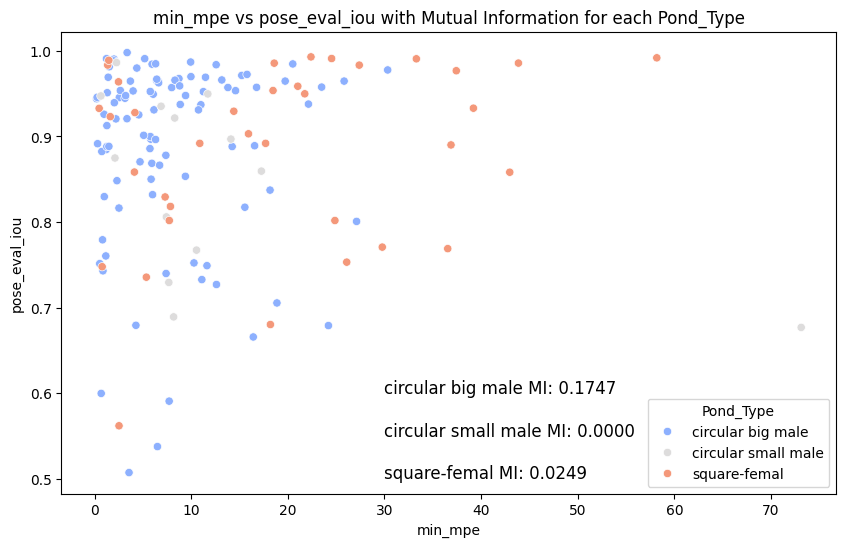

In [7]:
from sklearn.feature_selection import mutual_info_regression

# Function to calculate mutual information for each pond type
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mutual information (same as previous)
mutual_info_by_pond = calculate_mutual_information(df, 'min_mpe', 'pose_eval_iou')

# Create scatter plot for min_mpe vs pose_eval_iou, color by Pond_Type, and add MI labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='min_mpe', y='pose_eval_iou', hue='Pond_Type', data=df, palette='coolwarm')

# Add Mutual Information as text annotations on the plot
for pond_type, mi in mutual_info_by_pond.items():
    plt.text(30, 0.6 - 0.05 * list(mutual_info_by_pond.keys()).index(pond_type), 
             f'{pond_type} MI: {mi:.4f}', fontsize=12, color='black')

# Add labels and title
plt.title('min_mpe vs pose_eval_iou with Mutual Information for each Pond_Type')
plt.xlabel('min_mpe')
plt.ylabel('pose_eval_iou')
plt.legend(title='Pond_Type')
plt.show()



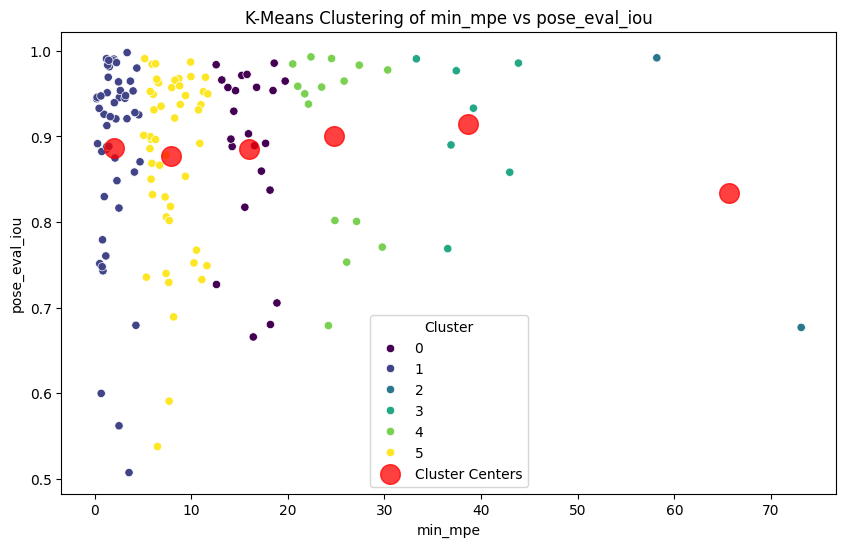

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select the relevant features for clustering
X = df[['min_mpe', 'pose_eval_iou']]

# Fit K-means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='min_mpe', y='pose_eval_iou', hue='cluster', palette='viridis', data=df)

# Add cluster centers to the plot
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, label='Cluster Centers')

# Plot formatting
plt.title('K-Means Clustering of min_mpe vs pose_eval_iou')
plt.xlabel('min_mpe')
plt.ylabel('pose_eval_iou')
plt.legend(title='Cluster')
plt.show()


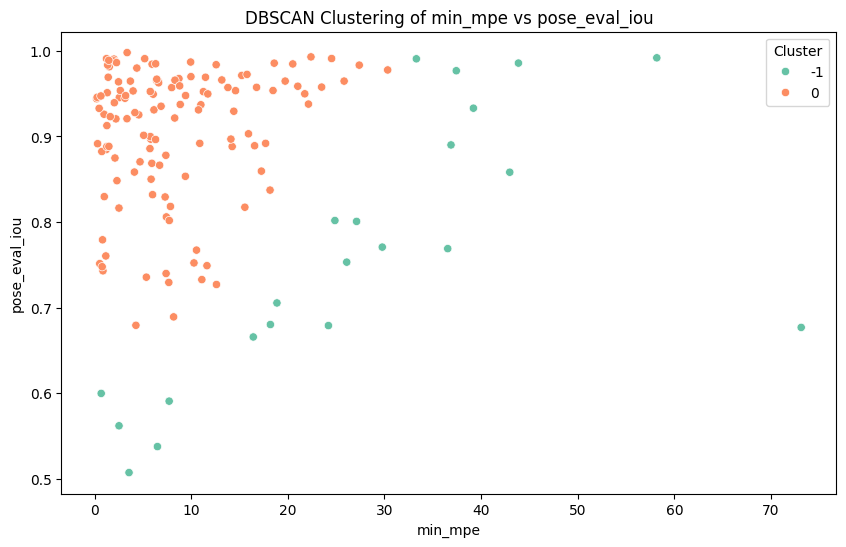

In [13]:
from sklearn.cluster import DBSCAN
import numpy as np

# Normalize the data for better performance with DBSCAN
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

# Fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['cluster_dbscan'] = dbscan.fit_predict(X_scaled)

# Plot the DBSCAN clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='min_mpe', y='pose_eval_iou', hue='cluster_dbscan', palette='Set2', data=df)

# Plot formatting
plt.title('DBSCAN Clustering of min_mpe vs pose_eval_iou')
plt.xlabel('min_mpe')
plt.ylabel('pose_eval_iou')
plt.legend(title='Cluster')
plt.show()


In [16]:
#mutual information between min_mpe and pose_eval_iou for each cluster
mutual_info_by_cluster = df.groupby('cluster').apply(lambda x: mutual_info_regression(x[['min_mpe']], x['pose_eval_iou'])[0])

# Display the mutual information for each cluster
print(mutual_info_by_cluster)


ValueError: Expected n_neighbors < n_samples_fit, but n_neighbors = 3, n_samples_fit = 2, n_samples = 2

In [13]:
import plotly.express as px





df['min_mpe_length-'] = df.apply(lambda row: row['Length_fov(mm)'] - row['Length_fov(mm)'] * row['min_mpe']/100, axis=1)
                                
df['min_mpe_length+']= df.apply(lambda row: row['Length_fov(mm)'] + row['Length_fov(mm)'] * row['min_mpe']/100, axis=1)

df['min_mae_length-'] = df.apply(lambda row: row['Length_fov(mm)'] -  row['min_mae'], axis=1)
df['min_mae_length+'] = df.apply(lambda row: row['Length_fov(mm)'] +  row['min_mae'], axis=1)




def get_closest_length_and_distance(row, target_length1,true_length2):
    lengths = [row['Length_1'], row['Length_2'], row['Length_3']]
    closest_length_1 = min(lengths, key=lambda x: abs(x - target_length1))
    distance_1 = abs(closest_length_1 - target_length1)
    closest_length_2 = min(lengths, key=lambda x: abs(x - true_length2))
    distance_2 = abs(closest_length_2 - true_length2)

    if distance_1 < distance_2:
        closest_length = closest_length_1
        distance = distance_1
    else:
        closest_length = closest_length_2
        distance = distance_2


    return closest_length, distance

# Apply the function to find the closest length and distance to min_mpe_length-
df['closest_length_min_mpe'] = df.apply(
    lambda row: (get_closest_length_and_distance(row, row['min_mpe_length-'],row['min_mpe_length+'])), axis=1
)

df['closest_length_min_mae'] = df.apply( lambda row: (get_closest_length_and_distance(row, row['min_mae_length-'],row['min_mae_length+'])), axis=1)

# Apply the function to find the closest length and distance to min_mpe_length+
df['closest_length_min_mae_value']=df['closest_length_min_mae'].apply(lambda x: x[0] if isinstance(x, tuple) else x)
# Assuming df cont



import plotly.graph_objects as go


#scatter plot between length_fov and closest_length_min_mae_value
fig = px.scatter(df,color='Pond_Type',x= 'focal_RealLength(cm)', y='closest_length_min_mae_value', hover_data=['Label', 'PrawnID'])
#add title
fig.update_layout(title=f'pinhole vs. closest_length_min_mae_value')
fig.add_trace(go.Scatter(x=[0, 50], y=[0, 50], mode='lines', name='line'))

#save the plot to png
fig.write_image(f'carapace pinhole vs. closest_length_min_mae_value.png')
#add a trendline

#add line


fig.show()
#
#

In [8]:
#min_mpe_focal_length from MPError_focal_min, MPError_focal_max, MPError_focal_median
# min_mae_focal_length from AbsError_focal_min, AbsError_focal_max, AbsError_focal_median

df['min_mpe_focal_length']=df[['MPError_focal_min', 'MPError_focal_max','MPError_focal_median']].min(axis=1)

df['max_mpe_focal_length']=df[['MPError_focal_min', 'MPError_focal_max','MPError_focal_median']].max(axis=1)

df['min_mae_focal_length']=df[['AbsError_focal_min', 'AbsError_focal_max','AbsError_focal_median']].min(axis=1)

df['max_mae_focal_length']=df[['AbsError_focal_min', 'AbsError_focal_max','AbsError_focal_median']].max(axis=1)


#print title of the prints
print('pond type count:')
print(df['Pond_Type'].value_counts())

print('pond type mean:')
print(df.groupby('Pond_Type')['Avg_Length'].mean())

print('pond type std:')
print(df.groupby('Pond_Type')['Avg_Length'].std())


print ('min_mpe fov median:')
print(df.groupby('Pond_Type')['min_mpe'].median())
#mean and std for each pond type of the lengt_1, length_2, length_

#print min_mae median and std for each pond type

print('min_mae fov median:')
print(df.groupby('Pond_Type')['min_mae'].median())



print('max_mpe fov median:')
print(df.groupby('Pond_Type')['max_mpe'].median())

print('max_mae fov median:')
print(df.groupby('Pond_Type')['max_mae'].median())


print('min_mpe focal length median:')
print(df.groupby('Pond_Type')['min_mpe_focal_length'].median())

print('max_mpe focal length median:')
print(df.groupby('Pond_Type')['max_mpe_focal_length'].median()) 

print('min_mae focal length median:')
print(df.groupby('Pond_Type')['min_mae_focal_length'].median())

print('max_mae focal length median:')   
print(df.groupby('Pond_Type')['max_mae_focal_length'].median())








pond type count:
Pond_Type
test-right    99
test-car      36
test-left     13
Name: count, dtype: int64
pond type mean:
Pond_Type
test-car      36.382602
test-left     24.400821
test-right    35.204135
Name: Avg_Length, dtype: float64
pond type std:
Pond_Type
test-car      5.056834
test-left     5.935468
test-right    5.529236
Name: Avg_Length, dtype: float64
min_mpe fov median:
Pond_Type
test-car      18.332959
test-left      8.182464
test-right     6.147389
Name: min_mpe, dtype: float64
min_mae fov median:
Pond_Type
test-car      6.451846
test-left     2.223462
test-right    2.121701
Name: min_mae, dtype: float64
max_mpe fov median:
Pond_Type
test-car      28.295583
test-left     20.843634
test-right    19.806458
Name: max_mpe, dtype: float64
max_mae fov median:
Pond_Type
test-car      11.455317
test-left      4.706797
test-right     6.940607
Name: max_mae, dtype: float64
min_mpe focal length median:
Pond_Type
test-car      17.297178
test-left      6.728062
test-right     5.131809
Na

In [18]:
#mean difference between min max of Length_1, Length_2, Length_3 for each pond type
print('mean difference between min max for each pond type:')
print(df.groupby('Pond_Type')['diff_max_min'].std())

mean difference between min max for each pond type:
Pond_Type
circular big male      3.423313
circular small male    3.619078
square-femal           3.387604
Name: diff_max_min, dtype: float64


In [16]:
#print uncertainty of the mean 
print('uncertainty of the mean:')
print(df.groupby('Pond_Type')['Std_Length'].mean()/np.sqrt(df.groupby('Pond_Type')['Avg_Length'].count()))

uncertainty of the mean:
Pond_Type
circular big male      0.261743
circular small male    0.649817
square-femal           0.428996
dtype: float64


In [ ]:
X = df[['camera_distance', 'pose_metric_1', 'pose_metric_2']]  # Add other pose metrics if available
X = sm.add_constant(X)
y = df['diff']
model = sm.OLS(y, X).fit()
print(model.summary())




melted_df = df.melt(id_vars=['Label','PrawnID'], value_vars=['Length_1', 'Length_2', 'Length_3'],
                   var_name='rater', value_name='measurement')
icc = pg.intraclass_corr(data=melted_df, targets=['Label','PrawnID'], raters='rater', ratings='measurement')
print(icc)


# Correlation Analysis
pearson_corr, pearson_p = pearsonr(df['keypoint_mm'], df['expert_mean'])
spearman_corr, spearman_p = spearmanr(df['keypoint_mm'], df['expert_mean'])
print(f"Pearson Correlation: {pearson_corr:.3f}, p-value: {pearson_p:.3e}")
print(f"Spearman Correlation: {spearman_corr:.3f}, p-value: {spearman_p:.3e}")

mean_measurements = (df['keypoint_mm'] + df['expert_mean']) / 2
diff_measurements = df['diff']
md = np.mean(diff_measurements)
sd = np.std(diff_measurements)

plt.figure(figsize=(10, 6))
plt.scatter(mean_measurements, diff_measurements, alpha=0.5)
plt.axhline(md, color='gray', linestyle='--', label=f'Mean Diff = {md:.2f} mm')
plt.axhline(md + 1.96*sd, color='red', linestyle='--', label=f'+1.96 SD = {md + 1.96*sd:.2f} mm')
plt.axhline(md - 1.96*sd, color='red', linestyle='--', label=f'-1.96 SD = {md - 1.96*sd:.2f} mm')
plt.xlabel('Mean of Measurements (mm)')
plt.ylabel('Difference (Keypoint - Expert) (mm)')
plt.title('Bland-Altman Plot')
plt.legend()
plt.show()



stat, p = shapiro(df['diff'])
print(f'Shapiro-Wilk Test: stat={stat:.3f}, p-value={p:.3e}')

# Homogeneity of Variance
# Assuming 'camera_distance_category' is already defined as in the visualization section
groups = df.groupby('camera_distance_category')['diff'].apply(list)
stat, p = levene(*groups)
print(f"Levene’s Test: stat={stat:.3f}, p-value={p:.3e}")
